# PHYS3116 Tutorial 2: Pandas and Markdown

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Introduction to Markdown
Markdown is used to annotate your code and provide more information.
There aren't strictly required but are helpful for documenting your progress.

Here are some useful markdown 

```
# Heading 1
## Heading 2

**bold**
*italicized*

List
- Ele 1 
- Ele 2
    - Ele 2.1
- Ele 1

Links  
[Name of Link](Link)

Styling for Code  
`variable/code`
```

P.S. Notice that we need two spaces to create a new line  
The code above will generate the following below:

# Heading 1
## Heading 2

**bold**
*italicized*

List
- Ele 1 
- Ele 2
    - Ele 2.1
- Ele 1

Links  
[Name of Link](Link)

Styling for Code  

`variable/code`


This guide has more information on markdown syntax [markdown guide](https://www.markdownguide.org/basic-syntax/)

## Matplotlib: Advanced

Some fancier plots.
Completely optional but doesnt help make certain relationship clearer.

In [3]:
# Generating some random data
x = np.arange(0, 100, 1) # array starting from 0 and ending at 99, taking steps of 1
xerr = 2.5 * np.random.rand(100) # x error values, stretches range of random numbers [0, 1] to [0, 2.5]
y = x + 50 * np.random.rand(100) # noisy y values, y = x-value + random number between 0 and 50
yerr = 2.5 * np.random.rand(100) # y error values, stretches range of random numbers [0, 1] to [0, 2.5]
z = np.random.rand(100) * 100 
df = pd.DataFrame({
    'x': x,
    'xerr': xerr,
    'y': y,
    'yerr': yerr,
    'z': z
})

Plotting with uncertainity

<ErrorbarContainer object of 3 artists>

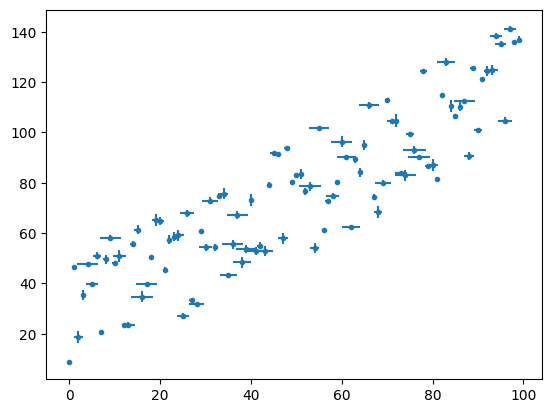

In [4]:
plt.errorbar(
    df['x'],
    df['y'],
    yerr=df['yerr'],
    xerr=df['xerr'],
    fmt='.'
)

3D Plots with Color Bars

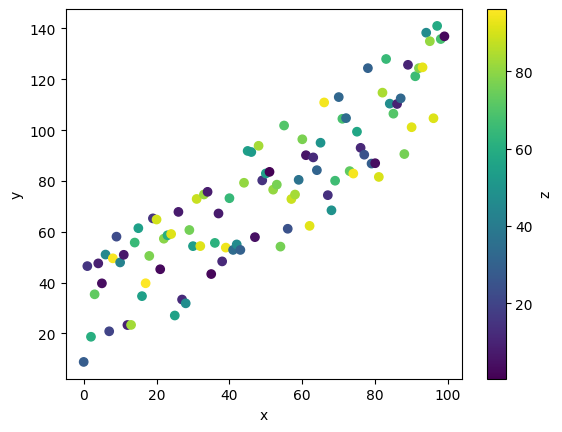

In [5]:
plt.scatter(
    df['x'],
    df['y'],
    c=df['z']
)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.set_label('z')

## Pandas
pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

Lets recreate the graph we just saw in the tutorial slides!

We can import the data using `pd.read_csv`.
```python
df = pd.read_csv('file.csv')
```

In [6]:
# Read in Harris Part 2 and 3
harris_p2 = pd.read_csv('HarrisPartII.csv')
harris_p3 = pd.read_csv('HarrisPartIII.csv')

To quickly get some info on the dataset, we can use: `head` method, which retrieve the first 5 columns of the dataframe
```python
df.head()
```

In [7]:
# Let us quickly have a look at what our data looks like
harris_p2.head()
harris_p3.head()

,ID,v_r,v_r_e,v_LSR,sig_v,sig_v_e,c,r_c,r_h,mu_V,rho_0,lg_tc,lg_th
0,NGC 104,-18.0,0.1,-26.7,11.0,0.3,2.07,0.36,3.17,14.38,4.88,7.84,9.55
1,NGC 288,-45.4,0.2,-51.9,2.9,0.3,0.99,1.35,2.23,20.05,1.78,8.99,9.32
2,NGC 362,223.5,0.5,214.0,6.4,0.3,1.76,0.18,0.82,14.80,4.74,7.76,8.93
3,Whiting 1,-130.6,1.8,-138.1,NaN,NaN,0.55,0.25,0.22,NaN,NaN,NaN,7.93
4,NGC 1261,68.2,4.6,54.9,NaN,NaN,1.16,0.35,0.68,17.73,2.99,8.59,9.12


We can access a specific column using `[]`
```python
df['column_name']
```

In [8]:
# Lets checkout the visual magnitude of harris_p2
harris_p2['M_V,t']

0      -9.42
1      -6.75
2      -8.43
3      -2.46
4       -7.8
       ...  
152    -9.03
153    -7.45
154    -4.47
155    -3.76
156    -5.81
Name: M_V,t, Length: 157, dtype: object

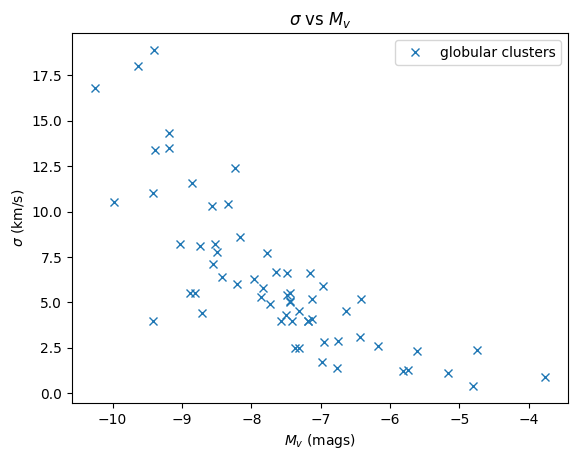

In [9]:
# Lets recreate the graph
# Convert the column to a number and make any errors NaN (Not A Number)
harris_p2['M_V,t'] = pd.to_numeric(harris_p2['M_V,t'], errors='coerce')

# Plot the data
plt.plot(
    harris_p2['M_V,t'],
    harris_p3['sig_v'],
    'x',
    label='globular clusters'
)

# Label the data 
plt.title(r'$\sigma$ vs $M_v$')
plt.xlabel('$M_v$ (mags)')
plt.ylabel('$\sigma$ (km/s)')
plt.legend()

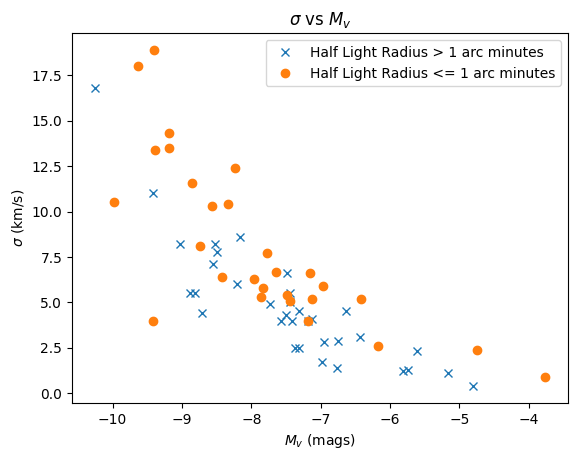

In [10]:
harris_p2['M_V,t'] = pd.to_numeric(harris_p2['M_V,t'], errors='coerce')
mask = harris_p3['r_h'] > 1

plt.plot(
    harris_p2['M_V,t'][mask],
    harris_p3['sig_v'][mask],
    'x',
    label='Half Light Radius > 1 arc minutes'
)

plt.plot(
    harris_p2['M_V,t'][~mask],
    harris_p3['sig_v'][~mask],
    'o',
    label='Half Light Radius <= 1 arc minutes'
)

plt.title(r'$\sigma$ vs $M_v$')
plt.xlabel('$M_v$ (mags)')
plt.ylabel('$\sigma$ (km/s)')
plt.legend()

# Exercises

## 1) Write some markdown 

Write some markdown here

## 2) CATALOG OF PARAMETERS FOR MILKY WAY GLOBULAR CLUSTERS
### a) Import Harris 1 Data set and convert the metallicity column to numerical data
### b) Plot X vs Z for globular clusters for clusters with metallicity greater than 0.8 and less than 0.8. (Hint: Harris 1 has X, Y, Z coordinates while Harris 2 has metallicity)
### c) Count how many clusters have a metallicity greater than 0.8.

A description of the data can be found in [Catalogue of Parameters for Milky Way Clusters by Harris](https://physics.mcmaster.ca/~harris/mwgc.dat) and [The Ages of 55 Globular Clusters as Determined Using an Improved \Delta V^HB_TO Method along with Color-Magnitude Diagram Constraints, and Their Implications for Broader Issues](https://ui.adsabs.harvard.edu/abs/2013ApJ...775..134V/abstract)  
Velocity Dispersion:https://astronomy.swin.edu.au/cosmos/v/Velocity+Dispersion  
Absolute Magnitude:https://astronomy.swin.edu.au/cosmos/A/Absolute+Magnitude  
Half Light Radius:https://astronomy.swin.edu.au/cosmos/H/Half-light+Radius

In [ ]:
# 2) a) Convert metallicity [Fe/H] to a number and make any errors NaN (Not A Number)
harris_p1 = pd.read_csv('HarrisPartI.csv')
harris_p2 = pd.read_csv('HarrisPartII.csv')
harris_p3 = pd.read_csv('HarrisPartIII.csv')
harris_p1.head()
harris_p2.head()
harris_p3.head()

# Defining the parameters
harris_p2['[Fe/H]'] = pd.to_numeric(harris_p2['[Fe/H]'], errors='coerce')
print(harris_p2['[Fe/H]'].describe())
print("NaNs in [Fe/H]:", harris_p2['[Fe/H]'].isna().sum())

count    152.000000
mean      -1.264934
std        0.565920
min       -2.370000
25%       -1.692500
50%       -1.320000
75%       -0.757500
max        0.000000
Name: [Fe/H], dtype: float64
NaNs in [Fe/H]: 5


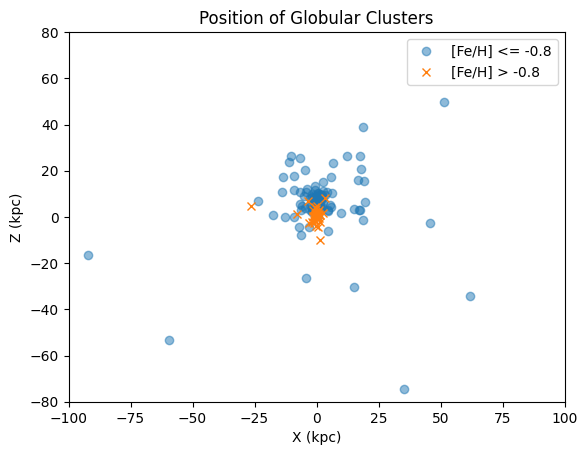

In [34]:
# 2) b) 
plt.ylim(-80, 80)
plt.xlim(-100, 100)
mask = harris_p2['[Fe/H]'] > -0.8 #takes values greater than -0.8

plt.plot(
    harris_p1[~mask]['Z'],
    harris_p1[~mask]['X'],
    'o',
    label='[Fe/H] <= -0.8',
    alpha=0.5
)

plt.plot(
    harris_p1[mask]['Z'],
    harris_p1[mask]['Y'],
    'x',
    label='[Fe/H] > -0.8',
)

plt.title('Position of Globular Clusters')
plt.ylabel('Z (kpc)')
plt.xlabel('X (kpc)')
plt.legend()

In [35]:
# 2) c)

print(f'There are {len(harris_p2[mask])} metal-rich globular clusters and {len(harris_p2[~mask])} metal-poor globular clusters')

There are 40 metal-rich globular clusters and 117 metal-poor globular clusters


Metal-poor globular clusters form a nearly spherical distribution about the Galactic
center, while more metal-rich clusters are found preferentially near the plane of the Galaxy, possibly associated with the thick disk.

This code is splitting globular clusters into two groups based on metallicity, then plotting their positions in the Galaxy.

## 3) The Ages of 55 Globular Clusters as Determined Using an Improved \Delta V^HB_TO Method along with Color-Magnitude Diagram Constraints, and Their Implications for Broader Issues
### a) Merge Harris 1 and vanderBurg together to one dataframe and save it
### b) How many globular clusters are common between the two surveys?



In [ ]:
# a
dataframe1 = pd.DataFrame({
    'id': [1, 2, 3],
    'height': [1, 2, 3]
})

dataframe2 = pd.DataFrame({
    'stars_id': [1, 2, 3],
    'width': [1, 2, 3]
})



Hint for these exercises, you will need a bit more help.

Hint 1: vandenBurg stores the NGC id (New General Catalogue) (i.e. 111 means NGC 111)  
Hint 2:
Let's consider the two dataframes.
They share data regarding the same star, but have slightly different naming conventions that makes it hard to consolidate.

Dataframe 1:
| id          | height      |
| ----------- | ----------- |
| 1           | 1           |
| 2           | 2           |
| 3           | 3           |

Dataframe 2:

| star_id | height |
|---------|--------|
| Star 1  | 1      |
| Star 2  | 2      |
| Star 4  | 4      |

To merge these two dataframes we need to complete a few operations:
1. Rename the column to be the same name to allow for the join
2. Update `id` column to mean the same format `Star X`
3. Save the dataframe

To rename columns, we can use 
`df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)`

In [16]:
# renaming the columns in df1 to be 'star_id`
df1.rename(columns={'id': 'star_id'}, inplace=True)
df1

,star_id,height
0,1,1
1,2,2
2,3,3


Apply an operation using `apply` method `df['column'] = df['column'].apply(func))`

In [17]:
# Add Star to the start of the id column for dataframe 1 to match dataframe 2
def add_star(s):
    return "Star " + s
df1['star_id'] = df1['star_id'].apply(add_star)
df1

,star_id,height
0,Star 1,1
1,Star 2,2
2,Star 3,3


Merge dataframes on common column using `pd.merge`
Example: `df = pd.merge(df1, df2, on='star_id')`

In [18]:
# Merge the two dataframes on 'star_id'
df = pd.merge(df1, df2, on='star_id')
df

,star_id,height,width
0,Star 1,1,1
1,Star 2,2,2


Save to csv file for later using `df.to_csv('file_name.csv, index=False)`

In [19]:
# Save id
df.to_csv('dataframe.csv', index=False)

In [37]:
# 3) a)
harris_p1 = pd.read_csv('HarrisPartI.csv')
vandenBerg = pd.read_csv('vandenBerg_table2.csv') 

In [38]:
# 3) b)
vandenBerg.rename(columns={'#NGC': 'ID'}, inplace=True)
vandenBerg['ID'] = vandenBerg['ID'].apply(lambda s: "NGC " + s)
vandenBerg['ID']

0      NGC 104
1      NGC 288
2      NGC 362
3     NGC 1261
4     NGC 1851
5     NGC 2808
6     NGC 3201
7     NGC 4147
8     NGC 4590
9     NGC 4833
10    NGC 5024
11    NGC 5053
12    NGC 5272
13    NGC 5286
14    NGC 5466
15    NGC 5904
16    NGC 5927
17    NGC 5986
18    NGC 6101
19    NGC 6121
20    NGC 6144
21    NGC 6171
22    NGC 6205
23    NGC 6218
24    NGC 6254
25    NGC 6304
26    NGC 6341
27    NGC 6352
28    NGC 6362
29    NGC 6366
30    NGC 6397
31    NGC 6496
32    NGC 6535
33    NGC 6541
34    NGC 6584
35    NGC 6624
36    NGC 6637
37    NGC 6652
38    NGC 6656
39    NGC 6681
40    NGC 6715
41    NGC 6717
42    NGC 6723
43    NGC 6752
44    NGC 6779
45    NGC 6809
46    NGC 6838
47    NGC 6934
48    NGC 6981
49    NGC 7078
50    NGC 7089
51    NGC 7099
52    NGC XXXX
53    NGC XXXX
54    NGC XXXX
Name: ID, dtype: object

In [39]:
combined = pd.merge(harris_p1, vandenBerg, on='ID')
print(f'There are {len(combined)} common clusters.')
combined.to_csv('HarrisPartI_VandenBerg.csv', index=False)

There are 52 common clusters.
